In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
df=pd.read_csv("listings.csv")

In [4]:
#Let's check out the column names
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Let's do a initial check of the values in each of the columns.

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20211023135547,2021-10-23,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,"San Diego, California, United States",Mission Bay,NaN,32.78481,-117.25313,Entire condominium (condo),Entire home/apt,6,NaN,1 bath,2.0,4.0,"[""Essentials"", ""Elevator"", ""Washer"", ""Stove"", ...","$2,050.00",3,365,3.0,3.0,365.0,365.0,3.0,365.0,NaN,t,7,19,24,214,2021-10-23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20211023135547,2021-10-23,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,"San Diego, California, United States",We love living part of the year in San Diego. ...,within a few hours,100%,61%,f,https://a0.muscache.com/im/users/129123/profil...,https://a0.muscache.com/im/users/129123/profil...,Pacific Beach,6.0,6.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,NaN,Pacific Beach,NaN,32.80724,-117.25630,Entire bungalow,Entire home/apt,8,NaN,2 baths,2.0,3.0,"[""Essentials"", ""First aid kit"", ""Washer"", ""Pat...",$225.00,4,365,4.0,4.0,365.0,365.0,4.0,365.0,NaN,t,0,4,14,220,2021-10-23,71,10,0,2010-07-29,2021-08-09,4.85,4.85,4.69,4.95,4.93,4.83,4.83,NaN,f,5,5,0,0,0.52
2,38245,https://www.airbnb.com/rooms/38245,20211023135547,2021-10-24,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,Melinda,2010-07-12,"San Diego, California, United States",Hello Future and Returning Friends! It is Su...,within an hour,100%,50%,f,https://a0.muscache.com/im/users/164137/profil...,https://a0.muscache.com/im/users/164137/profil...,Loma Portal,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"San Diego, California, United States",Roseville,NaN,32.74202,-117.21870,Private room in residential home,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""First aid kit"", ""Body soap"", ""...",$74.00,1,21,1.0,1.0,21.0,21.0,1.0,21.0,NaN,t,19,41,71,346,2021-10-24,146,3,0,2013-0

After an initial observation, we can eliminate several of variables such as id, listing_url, name from modelling. The following
is the list of initial variables for consideration.

In [6]:
init_vars=["host_since", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", 
           "host_listings_count", "host_identity_verified", "latitude", "longitude", "room_type", "accommodates", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights",
           "availability_30", "number_of_reviews", "instant_bookable", "review_scores_rating"]
df_init=df[init_vars]

The following will generate the percent of null values in each variable.

In [7]:
pd.set_option('display.max_rows', None)
df_init.isnull().mean() * 100

host_since                 0.040453
host_response_time        14.947411
host_response_rate        14.947411
host_acceptance_rate      13.116909
host_is_superhost          0.040453
host_listings_count        0.040453
host_identity_verified     0.040453
latitude                   0.000000
longitude                  0.000000
room_type                  0.000000
accommodates               0.000000
bedrooms                  10.143608
beds                       0.768608
price                      0.000000
minimum_nights             0.000000
maximum_nights             0.000000
availability_30            0.000000
number_of_reviews          0.000000
instant_bookable           0.000000
review_scores_rating      13.450647
dtype: float64

Let's check the data type in each field.

In [8]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              9884 non-null   object 
 1   host_response_time      8410 non-null   object 
 2   host_response_rate      8410 non-null   object 
 3   host_acceptance_rate    8591 non-null   object 
 4   host_is_superhost       9884 non-null   object 
 5   host_listings_count     9884 non-null   float64
 6   host_identity_verified  9884 non-null   object 
 7   latitude                9888 non-null   float64
 8   longitude               9888 non-null   float64
 9   room_type               9888 non-null   object 
 10  accommodates            9888 non-null   int64  
 11  bedrooms                8885 non-null   float64
 12  beds                    9812 non-null   float64
 13  price                   9888 non-null   object 
 14  minimum_nights          9888 non-null   

Let's clean the following variables. Host_Since will be stored as number of days. Rates will be stored as float. Price will be converted to float.

In [9]:
df_init["host_since_days"]=pd.to_datetime("2021/12/26")-pd.to_datetime(df_init['host_since'])
df_init["host_since_days"]=df_init["host_since_days"]/np.timedelta64(1,"D")
df_init["host_response_rate"]=df_init["host_response_rate"].str.rstrip("%").astype('float') / 100.0
df_init["host_acceptance_rate"]=df_init["host_acceptance_rate"].str.rstrip("%").astype('float') / 100.0
df_init["price"]=df_init["price"].replace('[\$,]', '', regex=True).astype(float)

The following will drop any row with a null value.

In [10]:
df_init=df_init.dropna(axis=0, how ='any')
df_init.shape

(6530, 21)

This will separate the numeric variables and categorical variables.

In [11]:
numeric_vars=["host_since_days", "host_response_rate", "host_acceptance_rate", "host_listings_count", "latitude",
             "longitude", "accommodates", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "availability_30",
             "number_of_reviews"]
categorical_vars=["host_response_time", "host_is_superhost", "host_identity_verified", "room_type",
                 "instant_bookable"]

The following will look to detect multicollinearity among the numeric variables.

In [12]:
df_numeric=df_init[numeric_vars].dropna(axis=0, how ='any')
vif_df=pd.DataFrame()
vif_df["Feature"]=df_numeric.columns
vif_df["VIF"]=[variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
print(vif_df)

                 Feature            VIF
0        host_since_days       7.368315
1     host_response_rate      64.241754
2   host_acceptance_rate      25.138216
3    host_listings_count       1.186526
4               latitude  336658.056049
5              longitude  336859.022494
6           accommodates      17.858509
7               bedrooms      14.930795
8                   beds      11.321728
9                  price       1.297577
10        minimum_nights       1.162754
11        maximum_nights       2.331249
12       availability_30       2.567959
13     number_of_reviews       1.789972


Judging from the VIF table above, a few variables can be dropped such as host_acceptance_rate, beds.

In [13]:
numeric_vars=["host_since_days", "host_response_rate", "host_listings_count", "latitude",
             "longitude", "accommodates", "bedrooms", "price", "minimum_nights", "maximum_nights", "availability_30",
             "number_of_reviews"]

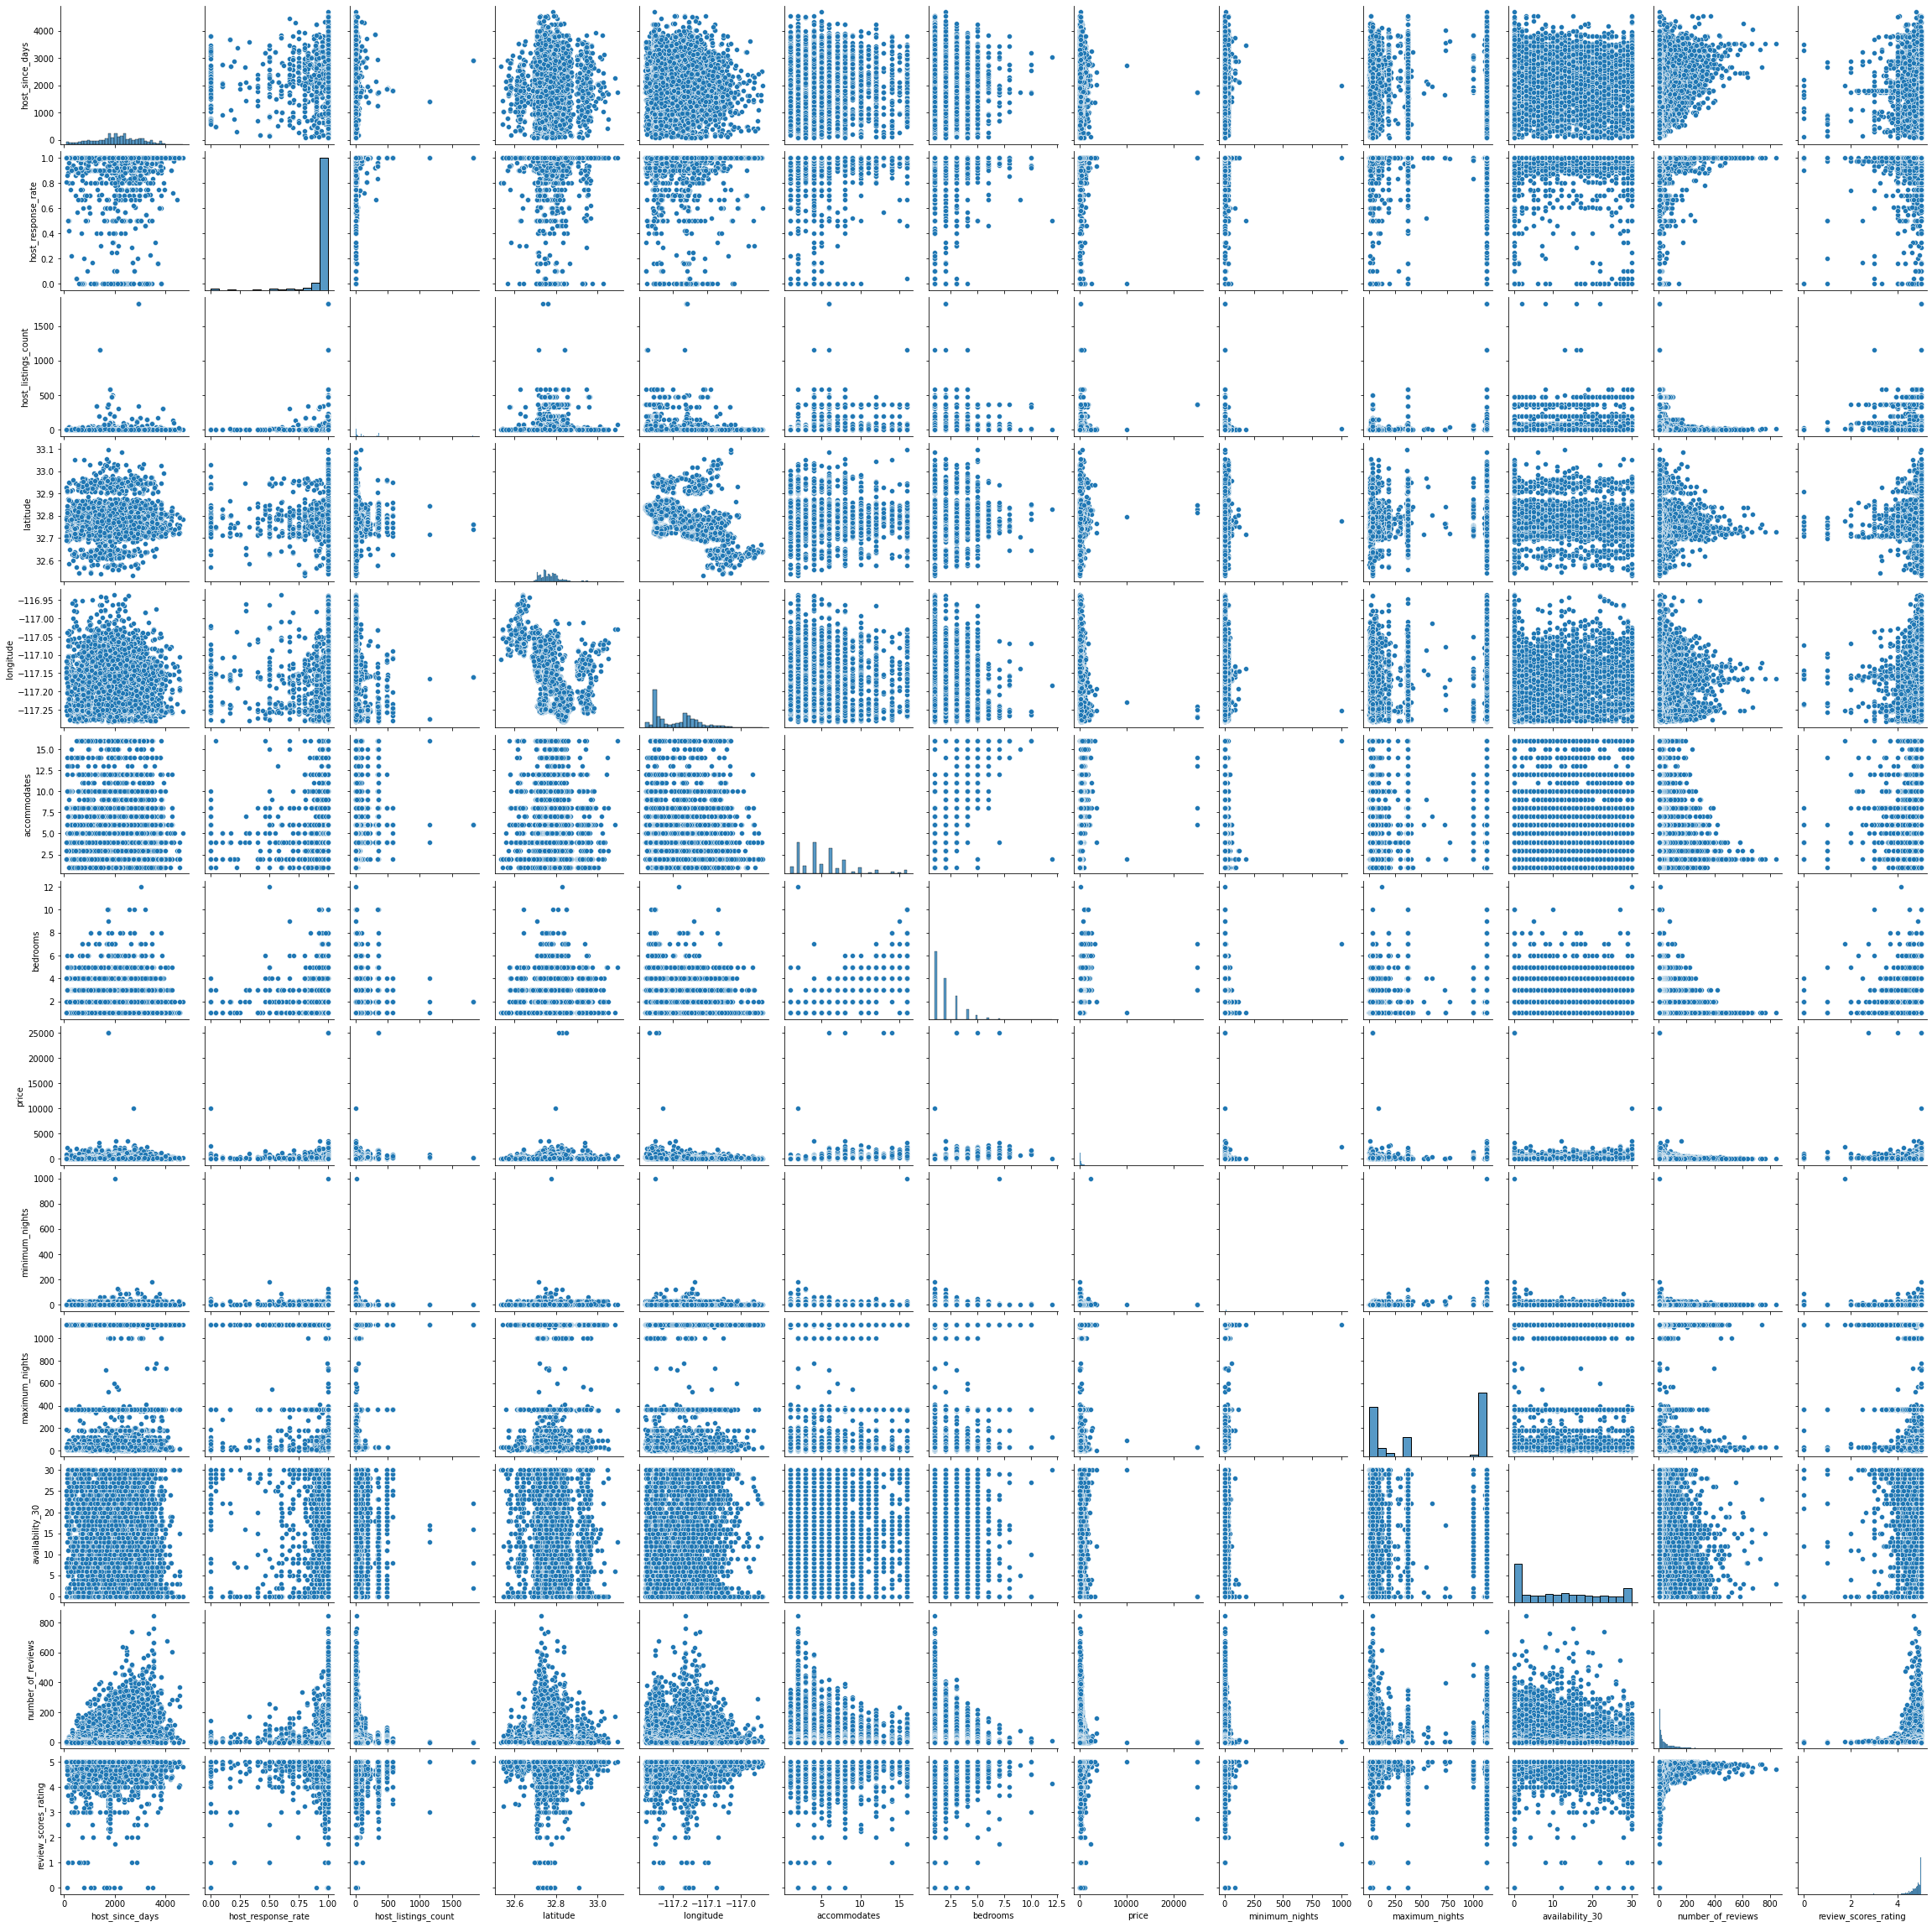

In [14]:
sns.pairplot(df_init[numeric_vars+["review_scores_rating"]])


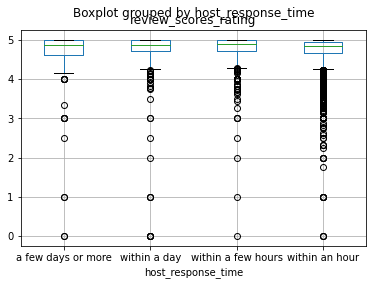

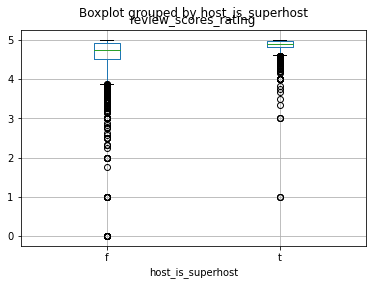

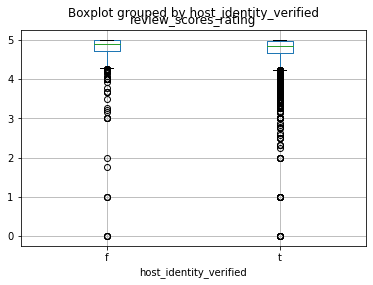

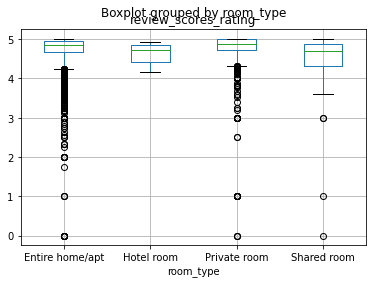

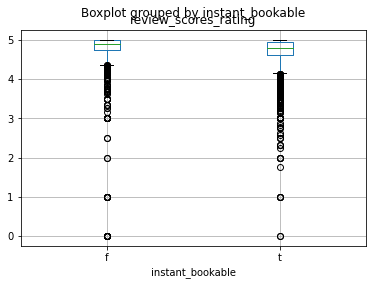

In [15]:
for item in categorical_vars:
    df_init.boxplot(by=item, column=["review_scores_rating"])

This will collect all variables into the final dataframe and drop any record with at least 1 missing value.

In [16]:
df_final=df_init[numeric_vars+categorical_vars+["review_scores_rating"]]
df_final=df_final.dropna(axis=0, how ='any')

In [17]:
df_final2 = pd.get_dummies(df_final,columns=categorical_vars,drop_first=True)

The following will split the data into 70% training and 30% validation.

In [18]:
X=df_final2.drop('review_scores_rating',axis=1)
y=df_final2['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The first model will be linear regression.

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_lm = lm.predict( X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lm)))

RMSE: 0.3480310859409795


Due to the existence of multicollinearity, an alternative choice would be ridge regression. We will run a grid search to look for the best parameters.

In [20]:
param = {'alpha':[.00001, .0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

Ridge_Model=Ridge()
search = GridSearchCV(Ridge_Model, param, scoring='neg_mean_squared_error',cv=5)
search_result=search.fit(X,y)
print('Best Score is %s' % search_result.best_score_)
print('Best Hyperparameters are %s' % search_result.best_params_)

Best Score is -0.14967139121149037
Best Hyperparameters are {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}


In [21]:
ridge_model = Ridge(alpha=0.01,normalize=True, fit_intercept=True, solver='lsqr')
ridge_model.fit(X_train,y_train)
predictions_ridge = ridge_model.predict( X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))

RMSE: 0.34784848114467437


It appears ridge regression is slightly outperforming linear regression. Thus ridge regression is chosen as the final model.

<AxesSubplot:xlabel='review_scores_rating', ylabel='Density'>

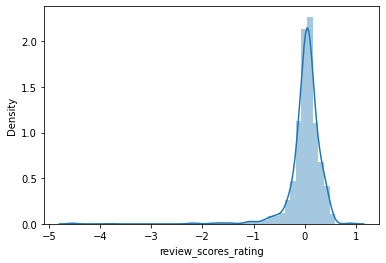

In [22]:
#Residual plot
residuals=y_test-predictions_ridge
sns.distplot(residuals)

In [23]:
# Saving the final model to a .pkl file
with open("ridge_model.pkl", 'wb') as file:
    pickle.dump(ridge_model, file)